# CO2 Concentration and Temperature Deviations Quick Analysis

This project explores the relationship between changing atmospheric composition and global climate patterns over the last six decades. By extracting and merging two datasets: Global Temperature Anomalies from NASA GISS and Carbon Dioxide measurements from NOAA's Mauna Loa Observatory, we constructed a simple time-series analysis. The main challenge was the visualization of two variables with vastly different scales: temperature deviations (measured in decimal of a degree Celsius) and atmospheric CO2 (measured in parts per million). This project aims to visually verify the correlation between greenhouse gas accumulation and surface temperature trends from 1958 to the present.

In [1]:
# Import all necessary libraries
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Step1: Load the data
This project will use datasets that directly loaded from the original sources: <br><br>
**1. NASA Global Temperature Data** <br>
This datasets is written in a wide format, which means months are showed as columns. <br>
Don't forget to skip the first row because it contains title. <br><br>
**2. Global Monitoring Laboratory** <br>
This datasets contains lines of comments, so we should be careful in loading the data. <br>
The comments starts with "#".


In [2]:
# NASA Global Temperature Data (GISTEMP)
# Skip the first row of header notes.
url_temp = "https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv"
df_temp = pd.read_csv(url_temp, skiprows=1)

# NOAA CO2 Data (Mauna Loa)
# This dataset has comments starting with '#'.
url_co2 = "https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_mm_mlo.csv"
df_co2 = pd.read_csv(url_co2, comment="#")


In [3]:
df_temp

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.19,-0.25,-0.09,-0.17,-0.10,-0.21,-0.19,-0.11,-0.15,-0.24,-.23,-.18,-.18,***,***,-0.12,-0.17,-.20
1,1881,-0.20,-0.14,0.03,0.05,0.06,-0.19,0.00,-0.04,-0.15,-0.22,-.19,-.07,-.09,-.10,-.18,0.05,-0.08,-.18
2,1882,0.16,0.14,0.04,-0.17,-0.15,-0.23,-0.17,-0.07,-0.14,-0.24,-.17,-.36,-.11,-.09,.08,-0.09,-0.16,-.18
3,1883,-0.29,-0.37,-0.12,-0.18,-0.17,-0.08,-0.07,-0.14,-0.21,-0.11,-.23,-.11,-.17,-.19,-.34,-0.16,-0.09,-.18
4,1884,-0.13,-0.07,-0.36,-0.40,-0.34,-0.36,-0.30,-0.27,-0.27,-0.25,-.34,-.31,-.28,-.27,-.10,-0.37,-0.31,-.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,2021,0.81,0.64,0.89,0.75,0.79,0.84,0.92,0.81,0.92,0.98,.92,.87,.84,.84,.75,0.81,0.86,.94
142,2022,0.91,0.89,1.04,0.83,0.84,0.92,0.94,0.95,0.88,0.97,.73,.80,.89,.90,.89,0.90,0.94,.86
143,2023,0.87,0.97,1.23,0.99,0.94,1.08,1.19,1.19,1.48,1.34,1.41,1.37,1.17,1.12,.88,1.05,1.15,1.41
144,2024,1.25,1.44,1.39,1.31,1.14,1.20,1.20,1.29,1.24,1.33,1.29,1.27,1.28,1.29,1.35,1.28,1.23,1.29


In [4]:
df_co2

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99
...,...,...,...,...,...,...,...,...
807,2025,6,2025.4583,429.61,427.16,26,0.71,0.27
808,2025,7,2025.5417,427.87,427.46,24,0.31,0.12
809,2025,8,2025.6250,425.48,427.37,24,0.38,0.15
810,2025,9,2025.7083,424.37,427.78,19,0.48,0.21


### Step 2: Data Cleaning
For temperature change data, select only the Year and the Annual Mean (J-D). To make the column name meaningful, we can rename it to "Temperature Anomaly". In addition, clean any unnecessary data that might return to error in result. <br>

For the CO2 data, we need to calculate the annual mean since the data is displayed monthly. Use groupby "Year" and "CO2_ppm". <br>

Lastly, we will choose and select only necessary columns for the data viz. 

In [5]:
# Select only the Year and the Annual Mean (J-D)
df_temp_clean = df_temp[["Year", "J-D"]].copy()
df_temp_clean.columns = ["Year", "Temperature_Anomaly"]

# Coerce to numeric to handle any potential "garbage" strings (like '***')
df_temp_clean["Temperature_Anomaly"] = pd.to_numeric(
    df_temp_clean["Temperature_Anomaly"], errors="coerce"
)

# Clean CO2 Data
# Group by Year to get the Annual Average
df_co2_annual = df_co2.groupby("year")["average"].mean().reset_index()
df_co2_annual.columns = ["Year", "CO2_ppm"]

In [6]:
df_temp_clean

,Year,Temperature_Anomaly
0,1880,-0.18
1,1881,-0.09
2,1882,-0.11
3,1883,-0.17
4,1884,-0.28
...,...,...
141,2021,0.84
142,2022,0.89
143,2023,1.17
144,2024,1.28


In [7]:
df_co2_annual

,Year,CO2_ppm
0,1958,315.237000
1,1959,315.981667
2,1960,316.908333
3,1961,317.643333
4,1962,318.453333
...,...,...
63,2021,416.414167
64,2022,418.528333
65,2023,421.075833
66,2024,424.604167


### Step 3: Merge the datasets
In this step, we simply need to merge those two cleaned datasets using "Year" as our primary key.
We choose inner join in this case because we only want to plot the matching data from our datasets, leaving the blank data.
Also, notice that the CO2 data starts in 1958, so we are going to choose that year as reference for filter.

In [8]:
# Merge on the common 'Year' column
co2_temp = pd.merge(df_temp_clean, df_co2_annual, on="Year", how="inner")

# Filter to start from 1958 (when CO2 data began)
co2_temp = co2_temp[co2_temp["Year"] >= 1958]

In [9]:
co2_temp

,Year,Temperature_Anomaly,CO2_ppm
0,1958,0.06,315.237000
1,1959,0.03,315.981667
2,1960,-0.03,316.908333
3,1961,0.06,317.643333
4,1962,0.03,318.453333
...,...,...,...
63,2021,0.84,416.414167
64,2022,0.89,418.528333
65,2023,1.17,421.075833
66,2024,1.28,424.604167


### Step 4: Create Dual-Axis Chart
To visualize the correlation between two variables with major different magnitude, we implemented a dual-axis chart using the plotly.graph_objects library. A subplot structure was initialized with a secondary Y-axis enabled. The global temperature anomalies were plotted as a solid red line against the primary left axis, while the CO₂ concentration was overlaid as a dotted blue line against the secondary right axis. To ensure interpretability, the axis titles were color-coded to match their respective data series.

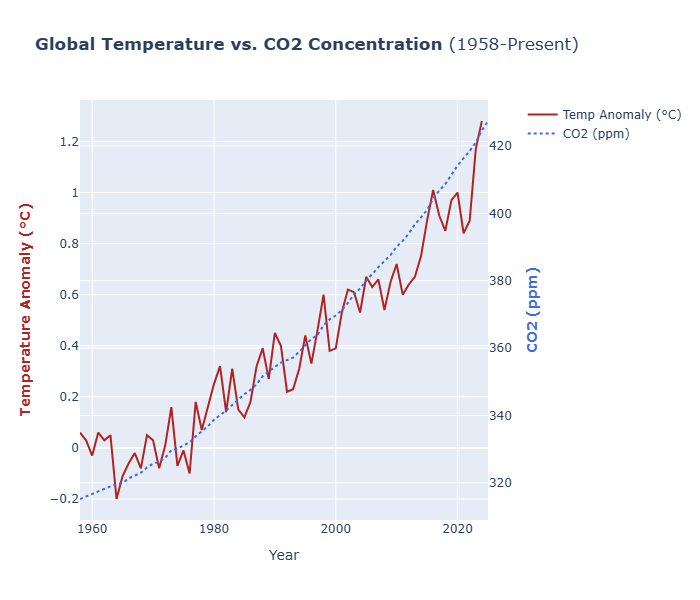

In [10]:
# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Trace 1: Temperature (Left y-Axis)
fig.add_trace(
    go.Scatter(
        x=co2_temp["Year"],
        y=co2_temp["Temperature_Anomaly"],
        name="Temp Anomaly (°C)",
        line=dict(color="firebrick", width=2),
    ),
    secondary_y=False,
)

# Add Trace 2: CO2 (Right y-Axis)
fig.add_trace(
    go.Scatter(
        x=co2_temp["Year"],
        y=co2_temp["CO2_ppm"],
        name="CO2 (ppm)",
        line=dict(color="royalblue", width=2, dash="dot"),
    ),
    secondary_y=True,
)

# Add Titles and Labels
fig.update_layout(
    title_text="<b>Global Temperature vs. CO2 Concentration</b> (1958-Present)",
    height=600,
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(
    title_text="<b>Temperature Anomaly (°C)</b>",
    title_font=dict(color="firebrick"),
    secondary_y=False,
)
fig.update_yaxes(
    title_text="<b>CO2 (ppm)</b>", title_font=dict(color="royalblue"), secondary_y=True
)

fig.show("png")

### Conclusion
The visualization demonstrates a strong positive correlation between atmospheric CO2 concentrations and global temperature anomalies. While the CO2 data (blue dotted line) exhibits a consistent upward trajectory, the temperature data (red solid line) displays natural year-to-year variability (noise) but adheres to the same long-term ascending slope. Notably, as CO2 levels surpassed 350 ppm around 1990, the frequency and intensity of positive temperature anomalies increased almost significantly. This parallel movement supports the scientific consensus that rising greenhouse gas levels are a primary driver of observed global warming.